<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/ImportRawData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sinfo

     |████████████████████████████████| 71kB 3.8MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.1-cp36-none-any.whl size=7018 sha256=e826d4f9a27ba77f8d97fcac43cecc4ed469303ff84582e9486ae9e42dc6b082
  Stored in directory: /root/.cache/pip/wheels/11/f0/23/347d6d8e59787c2bc272162d18223dc3b45bd6dc40aceee6af
Successfully built sinfo


###Import git module

In [2]:
! git clone https://github.com/taile2007/Biosignal-analysis.git

Cloning into 'Biosignal-analysis'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 150 (delta 69), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (150/150), 6.48 MiB | 16.98 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [3]:
pwd

'/content'

In [4]:
%cd Biosignal-analysis/Data\ wrangling-01-Importation

/content/Biosignal-analysis/Data wrangling-01-Importation


In [5]:
import os
import sys
import re
import numpy as np
import pandas as pd
from module1.raw_data_parser import *

In [6]:
pwd

'/content/Biosignal-analysis/Data wrangling-01-Importation'

In [7]:
from sinfo import sinfo
sinfo()

-----
module1     0.1
numpy       1.19.5
pandas      1.1.5
pytz        2018.9
sinfo       0.3.1
tqdm        4.41.1
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.7.0
notebook            5.3.1
-----
Python 3.6.9 (default, Oct  8 2020, 12:12:24) [GCC 8.4.0]
Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
2 logical CPU cores, x86_64
-----
Session information updated at 2021-01-12 06:15


In [8]:
PACK_FOLDER = '/content/drive/MyDrive/Dataset/Packs'

In [9]:
pack = Paths_Info_Summary(PACK_FOLDER)


In [10]:
pack.data_folder

'/content/drive/MyDrive/Dataset/Packs'

## Liệt kê cây thư mục của gói Packs

In [11]:
pack.print_directory_tree(pack.data_folder)

|__Packs/
    |__fileId=1NqZJd4jsfNFQUZHQC4O6h2uqR53dcCpZ-requirements.txt
   |__Res_signal_samp/
        |__Profile.txt
      |__Raw data/
            |__Abd RIP.txt
            |__Avg AP.txt
            |__Dia AP.txt
            |__ECG.txt
            |__EMG1.txt
            |__EMG2.txt
            |__EMG3.txt
            |__EMG4.txt
            |__EMG5.txt
            |__EMG6.txt
            |__Flow Pressure.txt
            |__Flow Th.txt
            |__Microphone.txt
            |__HMM.txt
            |__VMM.txt
            |__OESP.txt
            |__Pleth Flowrate.txt
            |__PLMl.txt
            |__PLMr.txt
            |__Pulse.txt
            |__Snoring P.txt
            |__SpO2.txt
            |__Sys AP.txt
            |__Tx RIP.txt
      |__Scoring sequences/
            |__Respiratory events.txt
            |__SpO2.txt
            |__Desaturations.txt
            |__Micro Arousals.txt
            |__Hypnogramme.txt


##Gán dataframe cho 1 object tên là pinfo

In [12]:
pinfo = pack.create_signal_summary()

pinfo.head()

,full_paths,pack,filename,signal_type,Size (Mb)
0,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Abd RIP.txt,abd rip,3.304411
1,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Avg AP.txt,avg ap,4.410931
2,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Dia AP.txt,dia ap,4.401841
3,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,ECG.txt,ecg,67.016486
4,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG1.txt,emg1,48.448591


In [13]:
len(pinfo.signal_type.unique())

31

### Số lượng kiểu dữ liệu trong gói

In [15]:
len(pinfo.signal_type.unique())

31

### Kiểu tín hiệu trong gói

In [14]:
print(pinfo.signal_type.values)

['abd rip' 'avg ap' 'dia ap' 'ecg' 'emg1' 'emg2' 'emg3' 'emg4' 'emg5'
 'emg6' 'flow pressure' 'flow th' 'microphone' 'hmm' 'vmm' 'oesp'
 'pleth flowrate' 'plml' 'plmr' 'pulse' 'snoring p' 'spo2' 'sys ap'
 'tx rip' 'respi_evt' 'raw_spo2' 'evt_spo2' 'ma' 'hypno' 'profile'
 'fileid=1nqzjd4jsfnfquzhqc4o6h2uqr53dccpz-requirements']


### Mô tả thông tin dữ liệu

In [16]:
pinfo["Size (Mb)"].describe()

count    31.000000
mean     19.025112
std      21.302178
min       0.000046
25%       3.368794
50%       6.283715
75%      46.365494
max      67.016486
Name: Size (Mb), dtype: float64

# DataImporter class

* Sử dụng pandas thay vì numpy để xác định thời gian (thời điểm, thời lượng)
* Dùng OOP (Class) dùng mỗi instance là một thực thể riêng

In [17]:
case = DataImporter(signal_summary = pinfo, 
                    data_path = PACK_FOLDER,
                    pack_folder= 'Res_signal_samp')

case

Đây là data paser cho pack dữ liệu Res_signal_samp

Thông tin về Import_pack_profile

In [18]:
help(case.Import_pack_profile)

Help on method Import_pack_profile in module module1.raw_data_parser:

Import_pack_profile() method of module1.raw_data_parser.DataImporter instance
    Hàm truy xuất thông tin bệnh nhân:
    Đọc file Profile.txt và tạo ra 1 dict gồm Giới tính, chiều cao, 
    cân nặng, BMI cho bệnh nhân.



In [19]:
patient_info = case.Import_pack_profile()

patient_info

{'Chiều cao': 176.0, 'Cân nặng': 84.0, 'Giới tính': 'F', 'Tuổi': 36.32}

In [20]:
%cd '/content/drive/MyDrive/Dataset/Packs/'

/content/drive/MyDrive/Dataset/Packs


In [21]:
pwd

'/content/drive/MyDrive/Dataset/Packs'

# Dữ liệu chuỗi

In [22]:
case = DataImporter(signal_summary = pinfo, 
                    data_path = PACK_FOLDER,
                    pack_folder= 'Res_signal_samp')

case

Đây là data paser cho pack dữ liệu Res_signal_samp

In [ ]:
help(case.import_raw_data)

Help on method import_raw_data in module module1.raw_data_parser:

import_raw_data(signal_type:str, n_lines=None, samp_freq=None) method of module1.raw_data_parser.DataImporter instance
    Hàm cho phép tải bất kì dữ liệu nào thuộc loại 1 (raw data), 
    áp dụng tổng quát cho tất cả raw data
    
    :signal_type: tên viết tắt của loại dữ liệu, chú ý: luôn là chữ thường
    :n_lines: số nguyên, giới hạn số hàng cần tải, thấp nhất là 5;
    
    Ghi chú: 
    1) Nếu n_lines = None, hàm sẽ xuất ra 3 kết quả:
    :return 1: df_data, tín hiệu gốc, 
               pd.Series liên tục, có datetime index
    :return 2: df_resampled, tín hiệu tái chọn mẫu; 
               pd.Series liên tục, có datetime index
    :return 3: fs, giá trị tần số lấy mẫu gốc, int
    
    2) Nếu n_lines = 5, hàm chỉ xuất ra 2 kết quả:
    :return 1: pd.Series gồm 2 hàng: thới điểm bắt đầu và kết thúc xét nghiệm
    :return 2: fs: giá trị tần số lấy mẫu gốc, int
    
    3) Nếu không tìm thấy đường dẫn của loại tín

Tra bảng kiểu tín hiệu có thể lựa chọn

In [ ]:
print(pinfo.signal_type.values)

['abd rip' 'avg ap' 'dia ap' 'ecg' 'emg1' 'emg2' 'emg3' 'emg4' 'emg5'
 'emg6' 'flow pressure' 'flow th' 'microphone' 'hmm' 'vmm' 'oesp'
 'pleth flowrate' 'plml' 'plmr' 'pulse' 'snoring p' 'spo2' 'sys ap'
 'tx rip' 'respi_evt' 'raw_spo2' 'evt_spo2' 'ma' 'hypno' 'profile'
 'fileid=1nqzjd4jsfnfquzhqc4o6h2uqr53dccpz-requirements']


In [23]:
sample_df, resampled_df, fs = case.import_raw_data(signal_type='some strange type', 
                                                   samp_freq=None)

Không tìm thấy data cho tín hiệu  some strange type ở bệnh nhân này !


In [25]:
sample_df, resampled_df, fs = case.import_raw_data(signal_type='abd rip', 
                                                   samp_freq=None)

In [26]:
fs

32

In [27]:
sample_df

2017-09-30 22:52:18+02:00           -22.0
2017-09-30 22:52:18.031250+02:00    -22.0
2017-09-30 22:52:18.062500+02:00    -22.0
2017-09-30 22:52:18.093750+02:00    -21.0
2017-09-30 22:52:18.125000+02:00    -20.0
                                    ...  
2017-10-01 06:19:23.843750+02:00    -38.0
2017-10-01 06:19:23.875000+02:00    -68.0
2017-10-01 06:19:23.906250+02:00    -88.0
2017-10-01 06:19:23.937500+02:00   -114.0
2017-10-01 06:19:23.968750+02:00   -130.0
Name: abd rip, Length: 858432, dtype: float64

In [28]:
pinfo.full_paths

0     /content/drive/MyDrive/Dataset/Packs/Res_signa...
1     /content/drive/MyDrive/Dataset/Packs/Res_signa...
2     /content/drive/MyDrive/Dataset/Packs/Res_signa...
3     /content/drive/MyDrive/Dataset/Packs/Res_signa...
4     /content/drive/MyDrive/Dataset/Packs/Res_signa...
5     /content/drive/MyDrive/Dataset/Packs/Res_signa...
6     /content/drive/MyDrive/Dataset/Packs/Res_signa...
7     /content/drive/MyDrive/Dataset/Packs/Res_signa...
8     /content/drive/MyDrive/Dataset/Packs/Res_signa...
9     /content/drive/MyDrive/Dataset/Packs/Res_signa...
10    /content/drive/MyDrive/Dataset/Packs/Res_signa...
11    /content/drive/MyDrive/Dataset/Packs/Res_signa...
12    /content/drive/MyDrive/Dataset/Packs/Res_signa...
13    /content/drive/MyDrive/Dataset/Packs/Res_signa...
14    /content/drive/MyDrive/Dataset/Packs/Res_signa...
15    /content/drive/MyDrive/Dataset/Packs/Res_signa...
16    /content/drive/MyDrive/Dataset/Packs/Res_signa...
17    /content/drive/MyDrive/Dataset/Packs/Res_s

In [ ]:
help(case.import_adjacent_window_evt)

Help on method import_adjacent_window_evt in module module1.raw_data_parser:

import_adjacent_window_evt(signal_type='hypno', samp_freq=None, reshape=True) method of module1.raw_data_parser.DataImporter instance
    Hàm tải dữ liệu chuỗi biến cố liên tục (loại 2A), thí dụ hypno; 
    hỗ trợ tái chọn mẫu và hoán chuyển ngược về loại 2B (danh sách biến cố không liên tục)
    
    :signal_type: tên viết tắt loại dữ liệu, Lưu ý: hàm này chỉ dùng cho 'hypno' hoặc 'spo2'
    :reshape = True có nghĩa là sẽ hoán chuyển 2A thành 2B, và xuất ra cả 2; 
    : reshape = False có nghĩa là không cần hoán chuyển, chỉ xuất ra dữ liệu chuỗi liên tục 2A
    :return 1: df_data: 1 pd.Series chứa dữ liệu chuỗi liên tục (gốc), có datetime index
    :return 2: df_resampled: 1 pd.Series chứa dữ liệu chuỗi liên tục (đã được tái chọn mẫu), có datetime index
    :return 3: dict_map: dictionary cho biết ý nghĩa các nhãn biến cố
    :return 4: df_event: chỉ khi reshape = True, dataframe danh sách biến cố không liên

In [ ]:
file_summary = pinfo
selected_paths = file_summary.loc[file_summary['signal_type']
                                      == 'ecg', 'full_paths']
selected_paths.values[0]                                     

'/content/drive/MyDrive/Dataset/Packs/Res_signal_samp/Raw data/ECG.txt'

In [ ]:
case.data_path

'/content/drive/MyDrive/Dataset/Packs/Res_signal_samp'

In [29]:
case.signal_summary

,full_paths,pack,filename,signal_type,Size (Mb)
0,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Abd RIP.txt,abd rip,3.304411
1,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Avg AP.txt,avg ap,4.410931
2,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Dia AP.txt,dia ap,4.401841
3,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,ECG.txt,ecg,67.016486
4,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG1.txt,emg1,48.448591
5,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG2.txt,emg2,46.274706
6,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG3.txt,emg3,46.902450
7,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG4.txt,emg4,46.719885
8,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG5.txt,emg5,46.485726
9,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG6.txt,emg6,48.036753


In [ ]:
type(pinfo)

pandas.core.frame.DataFrame

In [ ]:
type(case.signal_summary)

pandas.core.frame.DataFrame

In [ ]:
case.pack_folder

'Res_signal_samp'

In [ ]:
pinfo.head()

,full_paths,pack,filename,signal_type,Size (Mb)
0,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Abd RIP.txt,abd rip,3.304411
1,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Avg AP.txt,avg ap,4.410931
2,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Dia AP.txt,dia ap,4.401841
3,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,ECG.txt,ecg,67.016486
4,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG1.txt,emg1,48.448591


In [ ]:
list(pinfo.columns)

['full_paths', 'pack', 'filename', 'signal_type', 'Size (Mb)']

In [ ]:
path = pinfo['full_paths'][0]

In [ ]:
split_path = path.split(os.sep)
split_path

['',
 'content',
 'drive',
 'MyDrive',
 'Dataset',
 'Packs',
 'Res_signal_samp',
 'Raw data',
 'Abd RIP.txt']

In [ ]:
apack = split_path[-3]
apack

'Res_signal_samp'

In [ ]:
pack.get_info_from_path(path)

0        MyDrive
1    Abd RIP.txt
dtype: object

#Test Import Raw Data

In [30]:
sample_df, resampled_df, fs = case.import_raw_data(signal_type='flow th', 
                                                   samp_freq=16)

In [ ]:
resampled_df

2017-09-30 22:52:18+02:00           133.0
2017-09-30 22:52:18.062500+02:00     96.0
2017-09-30 22:52:18.125000+02:00     48.0
2017-09-30 22:52:18.187500+02:00      2.0
2017-09-30 22:52:18.250000+02:00    -43.0
                                    ...  
2017-10-01 06:19:23.687500+02:00     13.0
2017-10-01 06:19:23.750000+02:00    -27.0
2017-10-01 06:19:23.812500+02:00    -65.0
2017-10-01 06:19:23.875000+02:00    -97.0
2017-10-01 06:19:23.937500+02:00   -127.0
Freq: 62500U, Name: flow th, Length: 429216, dtype: float64

In [31]:
sample_df.shape[0] / resampled_df.shape[0]

2.0

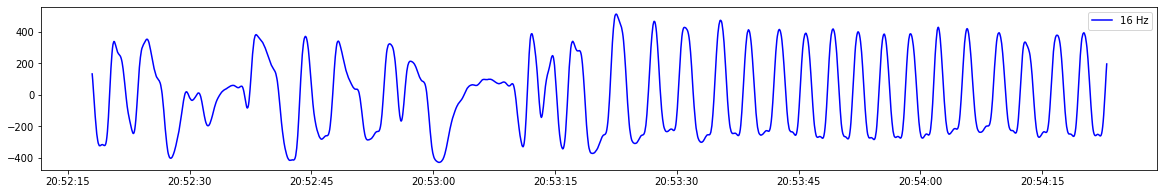

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.plot(resampled_df[0:2000], 'b-', label = '16 Hz')
plt.legend()

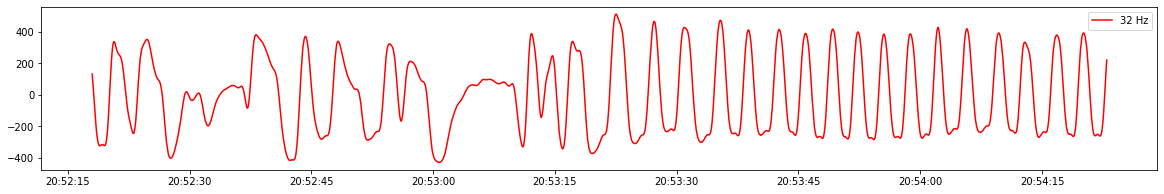

In [33]:
plt.figure(figsize=(20,3))
plt.plot(sample_df[0:4000], 'r-', label = '32 Hz')
plt.legend()

# Loại 2A: Dữ liệu chuỗi định tính liên tục

In [ ]:
help(case.import_adjacent_window_evt)

In [35]:
df_data, df_resampled, dict_map, window_len = \
case.import_adjacent_window_evt(signal_type='hypno', 
                                samp_freq = 16, 
                                reshape = False)

In [36]:
df_data

2017-09-30 23:00:00+02:00    0
2017-09-30 23:00:30+02:00    0
2017-09-30 23:01:00+02:00    0
2017-09-30 23:01:30+02:00    0
2017-09-30 23:02:00+02:00    0
                            ..
2017-10-01 06:14:00+02:00    2
2017-10-01 06:14:30+02:00    2
2017-10-01 06:15:00+02:00    2
2017-10-01 06:15:30+02:00    0
2017-10-01 06:16:00+02:00    0
Name: hypno, Length: 873, dtype: int64

df_data chứa label gốc, chưa lấy mẫu lại. 
Độ dài 873 cửa sổ phân đoạn (epoches).
* Số phút của dữ liệu

In [37]:
873*30/60

436.5

In [38]:
dict_map

{'Mvt': -1, 'N1': 1, 'N2': 2, 'N3': 3, 'N4': -1, 'REM': 4, 'Wake': 0}

In [39]:
window_len

30.0

In [40]:
df_resampled

2017-09-30 23:00:00+02:00           0
2017-09-30 23:00:00.062500+02:00    0
2017-09-30 23:00:00.125000+02:00    0
2017-09-30 23:00:00.187500+02:00    0
2017-09-30 23:00:00.250000+02:00    0
                                   ..
2017-10-01 06:15:59.750000+02:00    0
2017-10-01 06:15:59.812500+02:00    0
2017-10-01 06:15:59.875000+02:00    0
2017-10-01 06:15:59.937500+02:00    0
2017-10-01 06:16:00+02:00           0
Freq: 62500U, Name: hypno, Length: 418561, dtype: int64

Thời gian ước tính sau khi lấy mẫu lại

In [41]:
418561*(1/16)/60

436.00104166666665

# Loại 2b: Danh sách biến cố

In [42]:
help(case.import_irregular_window_evt)

Help on method import_irregular_window_evt in module module1.raw_data_parser:

import_irregular_window_evt(signal_type:str, samp_freq=None, get_true_stop_time=False) method of module1.raw_data_parser.DataImporter instance
    Hàm cho phép tải dữ liệu chuỗi biến cố thuộc loại 2B : không liên tục;
    hỗ trợ tái chọn mẫu với tần số tùy chọn
    
    :signal_type: tên viết tắt của loại dữ liệu, thí dụ 'respi_evt', 'ma' hoặc 'evt_spo2'
    :samp_freq: tần số lấy mẫu hoặc datetime array dùng để tái chọn mẫu
    :get_true_stop_time: Đồng bộ hóa với 1 raw data, 
    giá trị mặc định là False, khi đó chỉ sử dụng timestamps từ chuỗi biến cố,
    nếu True, sẽ dùng timestamps của tín hiệu thô tương ứng, 
    thí dụ respi_evt sẽ dùng Nasal flow Thermistor, desaturation sẽ dùng SpO2, ...
    Cách làm này cho phép tối ưu hóa về đồng bộ giữa chuỗi biến cố và tín hiệu thô.
    
    :return 1: 1 dataframe (chuỗi loại 2B) có cấu trúc mỗi hàng là 1 biến cố, 
    và 4 cột:'evt_start, 'evt_stop', 'evt_info

In [43]:
resp_data, resp_resampled, resp_map, \
start_datetime, stop_datetime = \
case.import_irregular_window_evt(signal_type = 'respi_evt',
                                 samp_freq=16,
                                 get_true_stop_time=True)

In [44]:
resp_data

,evt_start,evt_stop,evt_info,evt_value
0,2017-09-30 23:20:53.919000+02:00,2017-09-30 23:21:04.718000+02:00,11,4
1,2017-09-30 23:22:36.417000+02:00,2017-09-30 23:23:03.798000+02:00,27,3
2,2017-09-30 23:23:20.564000+02:00,2017-09-30 23:23:30.088000+02:00,10,4
3,2017-09-30 23:25:38.441000+02:00,2017-09-30 23:26:07.409000+02:00,29,2
4,2017-09-30 23:26:12.072000+02:00,2017-09-30 23:26:56.715000+02:00,45,2
...,...,...,...,...
81,2017-10-01 05:43:48.937000+02:00,2017-10-01 05:46:37.985000+02:00,169,1
82,2017-10-01 05:46:38.381000+02:00,2017-10-01 05:46:55.048000+02:00,17,3
83,2017-10-01 05:47:17.270000+02:00,2017-10-01 06:06:20.921000+02:00,1144,2
84,2017-10-01 06:06:28.362000+02:00,2017-10-01 06:06:40.266000+02:00,12,4


In [45]:
from collections import Counter

Counter(resp_data.evt_value)


Counter({1: 6, 2: 21, 3: 10, 4: 42, 5: 2, 6: 5})

In [46]:
resp_data.groupby('evt_value').describe()['evt_info']

,count,mean,std,min,25%,50%,75%,max
evt_value,,,,,,,,
1,6.0,102.166667,68.476030,36.0,54.0,77.0,148.75,204.0
2,21.0,412.142857,340.997403,29.0,145.0,342.0,514.00,1144.0
3,10.0,24.300000,11.804425,15.0,17.5,21.5,24.75,56.0
4,42.0,13.642857,2.911888,10.0,11.0,13.0,16.00,22.0
5,2.0,15.000000,7.071068,10.0,12.5,15.0,17.50,20.0
6,5.0,11.200000,2.167948,10.0,10.0,10.0,11.00,15.0


In [47]:
resp_map

{'CA': 6, 'CH': 4, 'FL': 1, 'OA': 5, 'OH': 3, 'RERA': 2}

In [48]:
print(start_datetime)
print(stop_datetime)

2017-09-30 23:00:00+02:00
2017-10-01 06:19:24+02:00


In [49]:
resp_resampled

,value
2017-09-30 23:00:00+02:00,0
2017-09-30 23:00:00.062500+02:00,0
2017-09-30 23:00:00.125000+02:00,0
2017-09-30 23:00:00.187500+02:00,0
2017-09-30 23:00:00.250000+02:00,0
...,...
2017-10-01 06:15:30.562500+02:00,2
2017-10-01 06:15:30.625000+02:00,2
2017-10-01 06:15:30.687500+02:00,2
2017-10-01 06:15:30.750000+02:00,2


Độ dài chuỗi (phút)

In [50]:
resp_resampled.shape[0]*(1/16)/60

435.51458333333335

## Hoán chuyển chuỗi định tính thành danh sách biến cố

In [51]:
help(case.adjacent_to_irregular)

Help on function adjacent_to_irregular in module module1.raw_data_parser:

adjacent_to_irregular(df_resampled:pandas.core.series.Series, samp_freq:int)
    Hàm chuyển đổi từ loại dữ liệu chuỗi 2A (sau tái chọn mẫu), sang loại dữ liệu chuỗi 2B
    Chỉ áp dụng cho chuỗi kết quả Hypnogram
    : df_resample: pandas Series, có nội dung là 1 chuỗi liên tục các label, có datetime index,
    : samp_freq: tần số lấy mẫu, 1 số nguyên, thí dụ 10, 30
    : return: 1 dataframe có cấu trúc: mỗi hàng là 1 biến cố,
    4 cột: evt_start/stop = thời điểm bắt đầu, thời điểm kết thúc;
    evt_info: độ dài của biến cố, tính bằng giây,
    evt_value: Nhãn của biến cố, quy định trong dictionary



In [52]:
sleep_states = case.adjacent_to_irregular(df_resampled, samp_freq = 16)

sleep_states

,evt_start,evt_stop,evt_info,evt_value
0,2017-09-30 23:00:00+02:00,2017-09-30 23:19:59.937500+02:00,1200.0000,0.0
1,2017-09-30 23:20:00+02:00,2017-09-30 23:20:29.937500+02:00,30.0000,1.0
2,2017-09-30 23:20:30+02:00,2017-09-30 23:23:29.937500+02:00,180.0000,2.0
3,2017-09-30 23:23:30+02:00,2017-09-30 23:23:59.937500+02:00,30.0000,0.0
4,2017-09-30 23:24:00+02:00,2017-09-30 23:25:29.937500+02:00,90.0000,1.0
...,...,...,...,...
79,2017-10-01 06:04:30+02:00,2017-10-01 06:06:59.937500+02:00,150.0000,2.0
80,2017-10-01 06:07:00+02:00,2017-10-01 06:07:59.937500+02:00,60.0000,0.0
81,2017-10-01 06:08:00+02:00,2017-10-01 06:08:59.937500+02:00,60.0000,1.0
82,2017-10-01 06:09:00+02:00,2017-10-01 06:15:29.937500+02:00,390.0000,2.0


Đánh giá mức độ trạng thái ngủ

In [53]:
100*sleep_states.groupby('evt_value')['evt_info'].sum()/(sleep_states.evt_info.sum())

evt_value
0.0     7.339671
1.0     7.110075
2.0    44.036592
3.0    16.169686
4.0    25.343976
Name: evt_info, dtype: float64

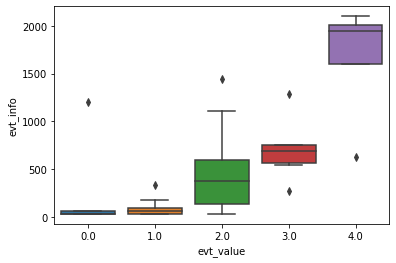

In [54]:
import seaborn as sns

sns.boxplot(data = sleep_states, x = 'evt_value', y = 'evt_info')
plt.show()

## Tải đồng thời nhiều tín hiệu

In [55]:
help(case.import_multiple_raw_data)

Help on method import_multiple_raw_data in module module1.raw_data_parser:

import_multiple_raw_data(type_list:list, samp_freq:int, n_jobs:int) method of module1.raw_data_parser.DataImporter instance
    Hàm cho phép tải đồng thời nhiều kênh tín hiệu thô từ 1 list, 
    và đồng bộ hóa tất cả theo cùng 1 tần số lấy mẫu
    :type_list: 1 list nhiều tên viết tắt của loại tín hiệu;
    
    Ghi chú: Chỉ áp dụng cho raw data (Loại 1), không áp dụng được cho loại 2A và 2B
    :samp_freq: 1 giá trị tần số lấy mẫu duy nhất, dùng để tái chọn mẫu
    :n_jobs: Số tác vụ thi hành song song (threads)
    
    :return: 1 dictionary với keys là tên loại tín hiệu, 
    value là pd.Series chứa chuỗi tín hiệu tương ứng, đã được tái chọn mẫu,
    có datetime index.



Tải nhiều kênh và đồng bộ. 
Lưu ý: Quá trình này mất nhiều thời gian.

In [56]:
import time

start = time.perf_counter()

signal_pack = case.import_multiple_raw_data(['tx rip', 'flow th', 'abd rip', 
                                             'hmm', 'sys ap', 'oesp'], 
                                            10, 
                                            n_jobs = 6)

end = time.perf_counter()

print(f'Thi hành mất {round(end - start, 2)} giây')

Khởi động tác vụ song song, tải 6 kênh tín hiệu


Tải và tái chọn mẫu thành công kênh tx rip
Tải và tái chọn mẫu thành công kênh flow th
Tải và tái chọn mẫu thành công kênh abd rip
Tải và tái chọn mẫu thành công kênh hmm
Tải và tái chọn mẫu thành công kênh sys ap
Tải và tái chọn mẫu thành công kênh oesp

Đã tải xong 6 kênh tín hiệu
Thi hành mất 126.9 giây


In [57]:
signal_pack

{'abd rip': 2017-09-30 22:52:18+02:00           -22.0
 2017-09-30 22:52:18.100000+02:00    -20.0
 2017-09-30 22:52:18.200000+02:00    -16.0
 2017-09-30 22:52:18.300000+02:00    -12.0
 2017-09-30 22:52:18.400000+02:00     -8.0
                                     ...  
 2017-10-01 06:19:23.500000+02:00    260.0
 2017-10-01 06:19:23.600000+02:00    148.0
 2017-10-01 06:19:23.700000+02:00     64.0
 2017-10-01 06:19:23.800000+02:00    -12.0
 2017-10-01 06:19:23.900000+02:00    -88.0
 Freq: 100L, Name: abd rip, Length: 268260, dtype: float64,
 'flow th': 2017-09-30 22:52:18+02:00           133.0
 2017-09-30 22:52:18.100000+02:00     48.0
 2017-09-30 22:52:18.200000+02:00    -22.0
 2017-09-30 22:52:18.300000+02:00    -91.0
 2017-09-30 22:52:18.400000+02:00   -160.0
                                     ...  
 2017-10-01 06:19:23.500000+02:00    135.0
 2017-10-01 06:19:23.600000+02:00     55.0
 2017-10-01 06:19:23.700000+02:00     -8.0
 2017-10-01 06:19:23.800000+02:00    -65.0
 2017-10-01 06:

##Biểu diễn 6 loại tín hiệu 

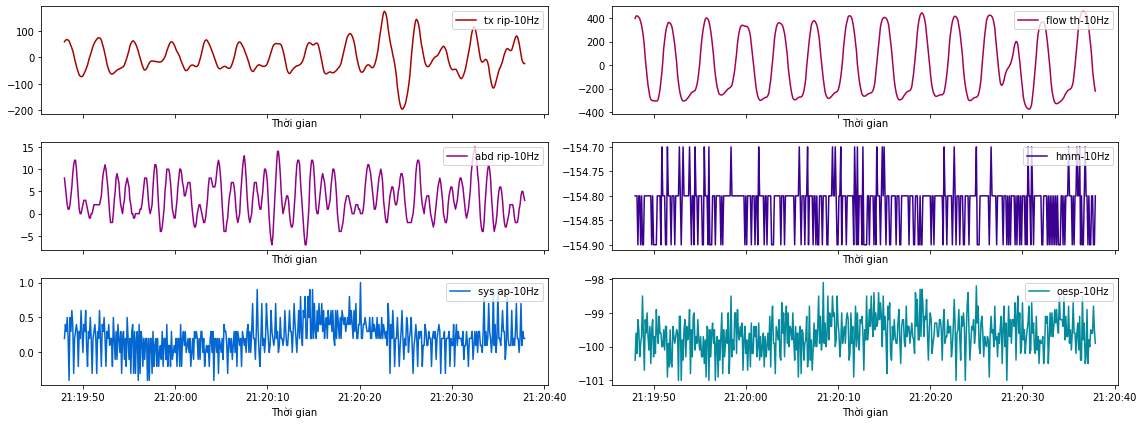

In [58]:
import matplotlib.dates as md

fig, axs = plt.subplots(nrows=3,ncols=2,
                        sharex=True, 
                        sharey=False,
                        figsize=(16,6))

fig.subplots_adjust(hspace=0.2)
colors = ['#a60202','#a60254','#910188','#3b0191','#0467d1','#038a9c']

for i, (ax, color) in enumerate(zip(axs.flatten(), colors)):
    k = list(signal_pack.keys())[i]
    s = list(signal_pack.values())[i][16500:17000]

    ax.plot(s,color = color,label =  f"{k}-10Hz")

    ax.legend(loc = 'upper right')
    xfmt = md.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_xlabel('Thời gian')
plt.tight_layout()
plt.show()